DECISION TREE - STUDENT PASS/FAIL

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
df=pd.read_csv('student_exam_tree.csv')
df

,hours_studied,sleep_hours,attendance,pass_fail
0,6.82,4.1,63.8,1
1,0.54,5.7,77.7,1
2,2.20,7.3,76.9,1
3,1.84,5.3,71.6,0
4,1.76,7.3,67.7,0
...,...,...,...,...
145,7.85,6.2,82.0,1
146,8.95,5.5,92.7,1
147,4.61,8.4,94.0,1
148,0.38,5.8,63.7,0


In [21]:
print(df.shape)
print(df.columns.tolist())
print(df.dtypes)

(150, 4)
['hours_studied', 'sleep_hours', 'attendance', 'pass_fail']
hours_studied    float64
sleep_hours      float64
attendance       float64
pass_fail          int64
dtype: object


In [22]:
df.isnull().sum()

hours_studied    0
sleep_hours      0
attendance       0
pass_fail        0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.describe()

,hours_studied,sleep_hours,attendance,pass_fail
count,150.000000,150.000000,150.000000,150.000000
mean,4.752533,6.442000,76.350667,0.740000
std,2.846990,1.481033,14.489305,0.440104
min,0.030000,4.000000,50.100000,0.000000
25%,2.305000,5.200000,65.425000,0.000000
50%,4.700000,6.250000,76.150000,1.000000
75%,7.377500,7.800000,89.175000,1.000000
max,9.820000,9.000000,99.100000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hours_studied  150 non-null    float64
 1   sleep_hours    150 non-null    float64
 2   attendance     150 non-null    float64
 3   pass_fail      150 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


In [26]:
df.nunique()

hours_studied    137
sleep_hours       48
attendance       128
pass_fail          2
dtype: int64

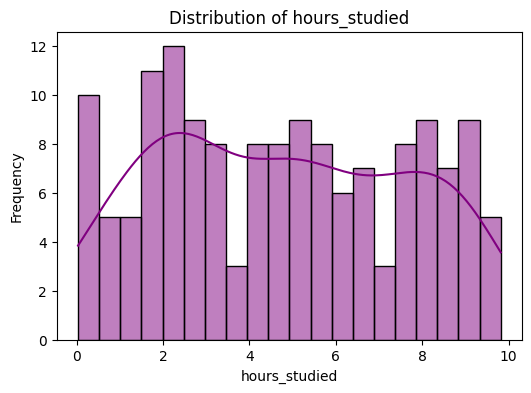

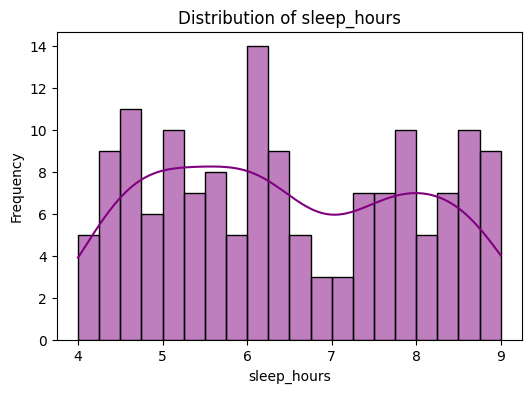

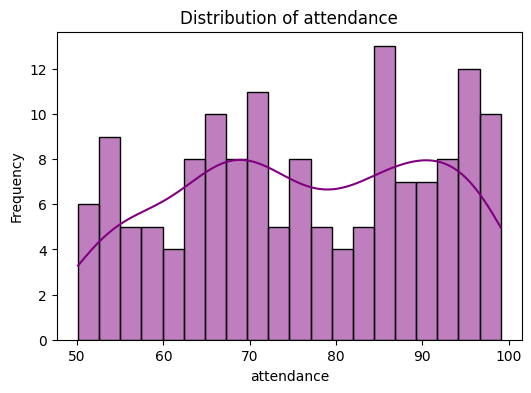

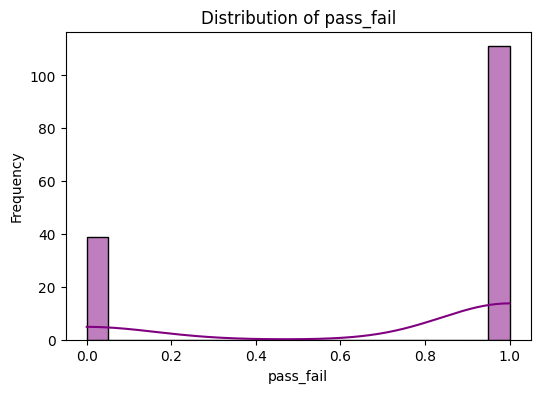

In [35]:
for i in df.columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[i],kde=True,color='purple',bins=20)
  plt.title(f'Distribution of {i}')
  plt.ylabel('Frequency')
  plt.show()

In [28]:
for i in df.columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower,upper=Q1-1.5*IQR,Q3+1.5*IQR
  outliers=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outliers} outliers')

hours_studied: 0 outliers
sleep_hours: 0 outliers
attendance: 0 outliers
pass_fail: 0 outliers


In [29]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Precision: {precision_score(y_test,y_pred)}') 
print(f'Recall: {recall_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0


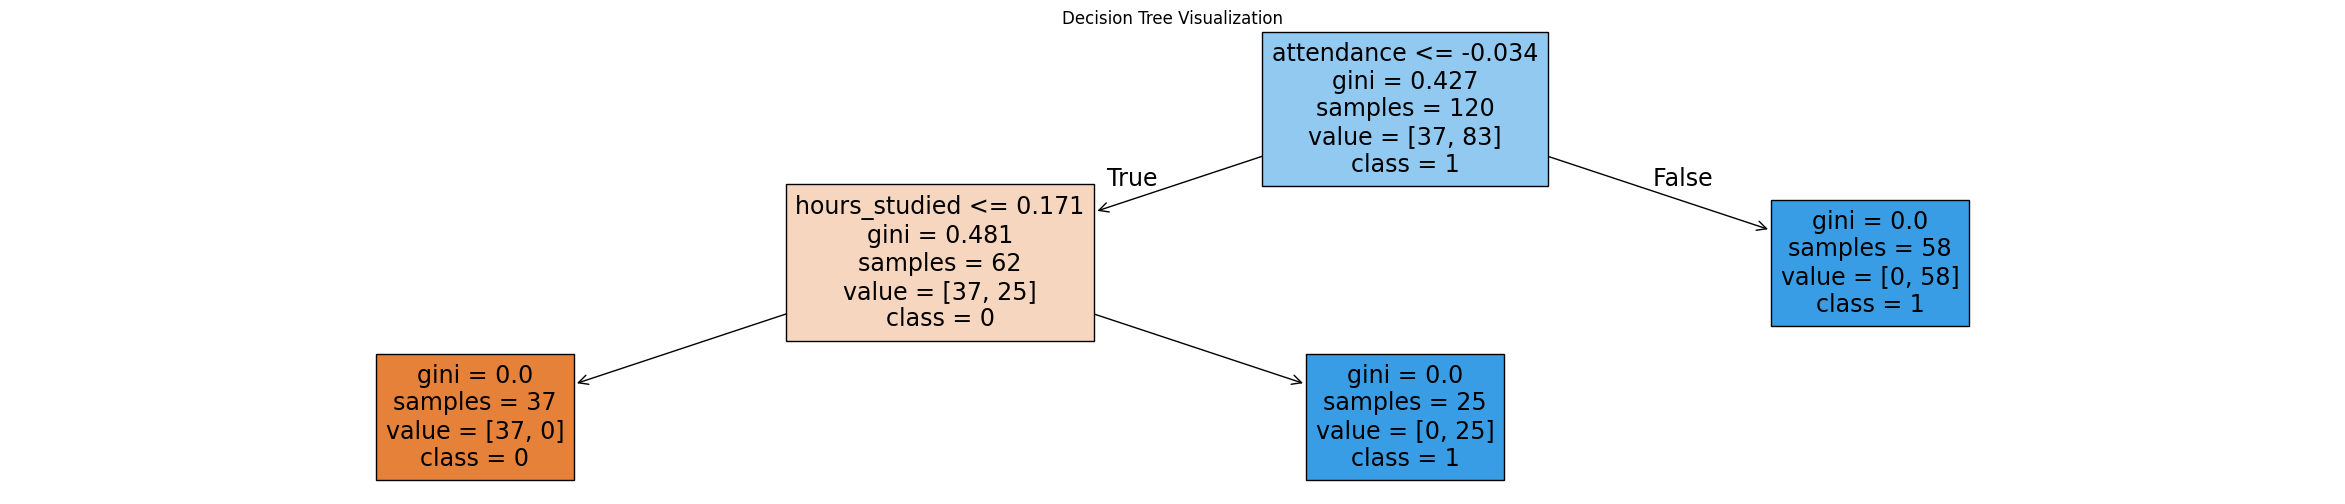

In [30]:
plt.figure(figsize=(30,6))
plot_tree(model,feature_names=X.columns,class_names=np.unique(y).astype(str),filled=True)
plt.title('Decision Tree Visualization')
plt.savefig('plots/decision_tree.png')
plt.show()

In [31]:
#need to scale the input values else it results in wrong prediction
input_scaled=scaler.transform([[8,6,0.8]])
result_pred=model.predict(input_scaled)
if (result_pred[0]==1):
  print('The student is predicted to pass')
else:
  print('The student is predicted to fail')

The student is predicted to pass


d:\AI WORKFORCE\SVM AND DECISION TREE TASKS (PASS OR FAIL)\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
import pickle

with open('model.pkl','wb') as fp:
  pickle.dump(model,fp)

In [33]:
with open('scaler.pkl','wb') as fp:
  pickle.dump(scaler,fp)